In [29]:
import pandas as pd

headers = ["Date", "Share Volume", "Value Volume", "Open", "High", "Low", "Close", "Close-Open", "Trades"]
df = pd.read_csv("2330.csv", names = headers)
df.sort_values(by = "Date", inplace = True, ascending = True)

df.Date = pd.to_datetime(df.Date)
df.set_index("Date", inplace = True)
df["Daily Return"] = df["Close"].pct_change()

df2 = pd.read_csv("1303.csv", names = headers)
df2.sort_values(by = "Date", inplace = True, ascending = True)

df2.Date = pd.to_datetime(df2.Date)
df2.set_index("Date", inplace = True)
df2["Daily Return"] = df2["Close"].pct_change()

Text(0,0.5,'Share Volume')

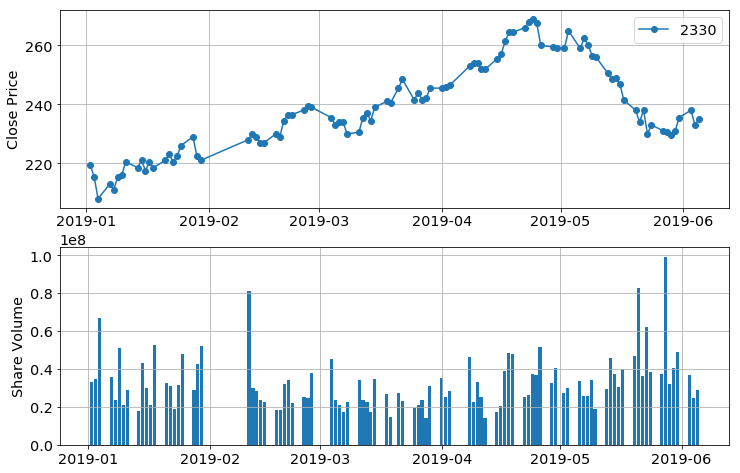

In [42]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

plt.figure()

plt.subplot(211)
plt.plot(df.index, df.Close, 'o-')
plt.grid(True)
plt.ylabel('Close Price')
plt.legend(["2330"])

plt.subplot(212)
plt.bar(df.index, df["Share Volume"])
plt.grid(True)
plt.ylabel('Share Volume')

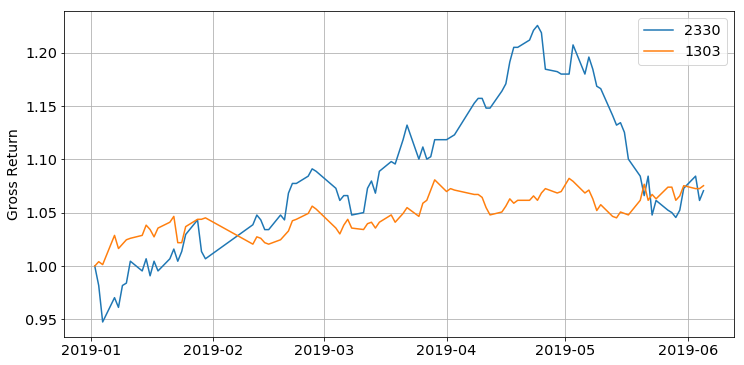

In [43]:
plt.figure(figsize = (12, 6))

plt.plot(df.index, df["Close"] / df["Close"][0])
plt.plot(df2.index, df2["Close"] / df2["Close"][0])
plt.grid(True)
plt.ylabel("Gross Return", fontsize = 14)
plt.legend(["2330", "1303"])

plt.savefig("2330_vs_1303.png", dpi = 150) # this line should be placed before show()
plt.show()